# HR Analytics - Predicting Employee Performance
### Olivia Wang - June 2020

### This analysis aims at providing insights into how ML can contribute to the decision making and effeciency of a company's human capital growth and return on investment.

Dataset from: https://drive.google.com/open?id=1ria5DGCPf7YPoBCu6JDPIJ1gPu7niCEi.

In [27]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
df = pd.read_excel('hr_dataset.xls')

In [17]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [9]:
print(df.shape)

(1200, 28)


## 1. Determine which features are continuous and which are categorical

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [29]:
cat_var = list(df.select_dtypes(object).columns)

cont_var = list(df.columns[df.dtypes != object])
non_encode_cols = cont_var
cont_var.remove('PerformanceRating')
print('\nContinuous Variables are: ', cont_var)


Continuous Variables are:  ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Upon examination of the first few rows of the dataset, it appears that `EmpEnvironmentSatisfaction`, `EmpJobSatisfaction` and `EmpRelationshipSatisfaction` should fall under categorical variables.

In [30]:
con_to_cat = ['EmpEnvironmentSatisfaction', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction']
for col in con_to_cat:
    cat_var.append(col)
    cont_var.remove(col)
print('Categorical Variables are: ', cat_var)
print('\nContinuous Variables are: ', cont_var)

Categorical Variables are:  ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'EmpEnvironmentSatisfaction', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction']

Continuous Variables are:  ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## 2. Visualize the univariate distribution of each continuous feature, and the distribution of the target.

In [31]:
to_plot = cont_var
to_plot.append('PerformanceRating')
to_plot2 = cat_var
to_plot2.remove('EmpNumber')


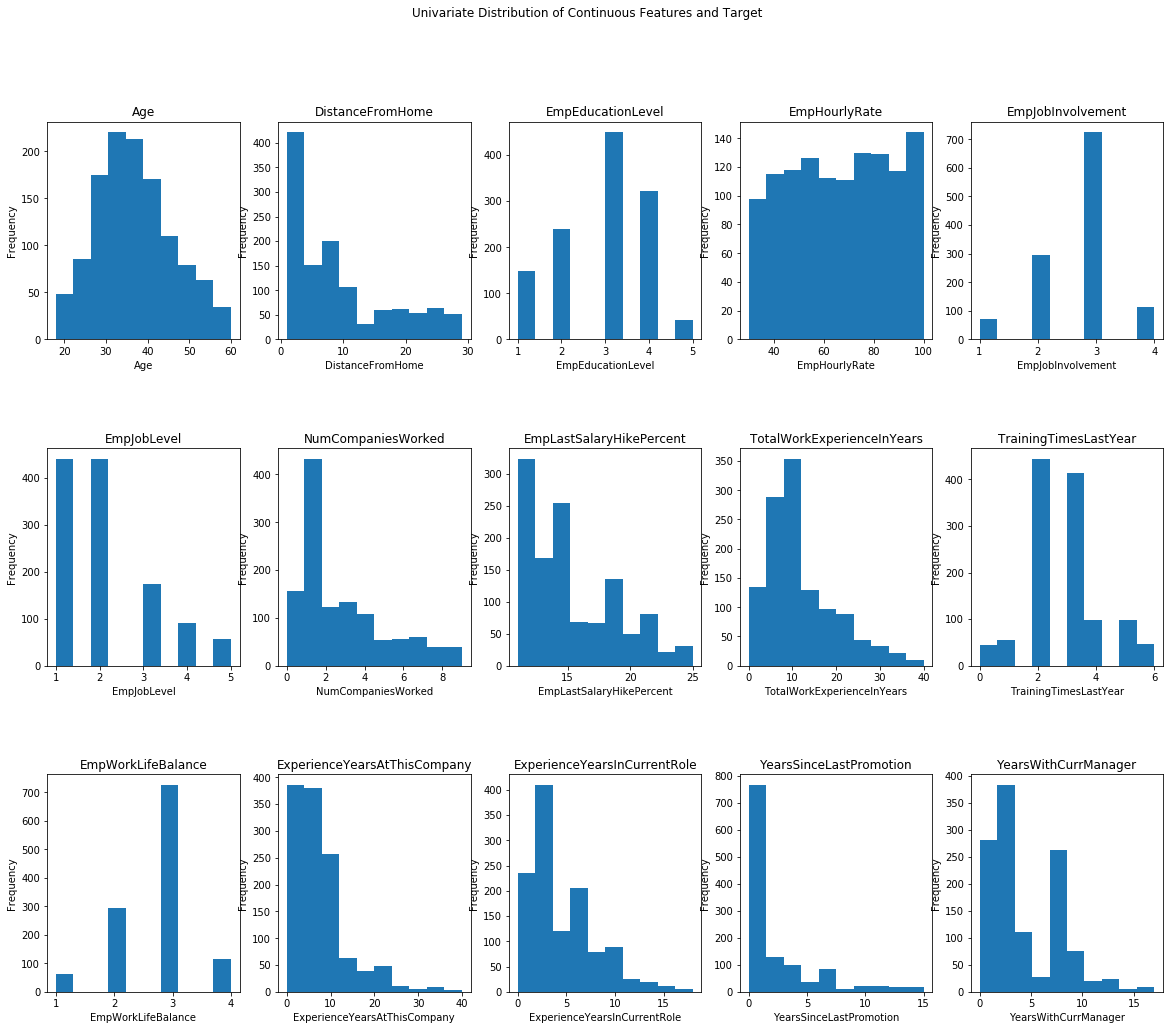

In [46]:
width = 5
fig, ax=plt.subplots(3, width, figsize=(20,16))
fig.suptitle('Univariate Distribution of Continuous Features and Target')
fig.subplots_adjust(hspace=0.5)
for row in range(len(ax)):
    for column in range(len(ax[0])):
        i = width*row +column
        ax[row,column].hist(df[to_plot[i]])
        if to_plot[i] != 'PerformanceRating':
            ax[row,column].title.set_text(to_plot[i])
            ax[row,column].set_xlabel(to_plot[i])
            ax[row,column].set_ylabel('Frequency')
        else:
            ax[row,column].title.set_text('Performance Rating (Target)')
            ax[row,column].set_xlabel('Performance Rating (Target)')
            ax[row,column].set_ylabel('Frequency')
plt.show()



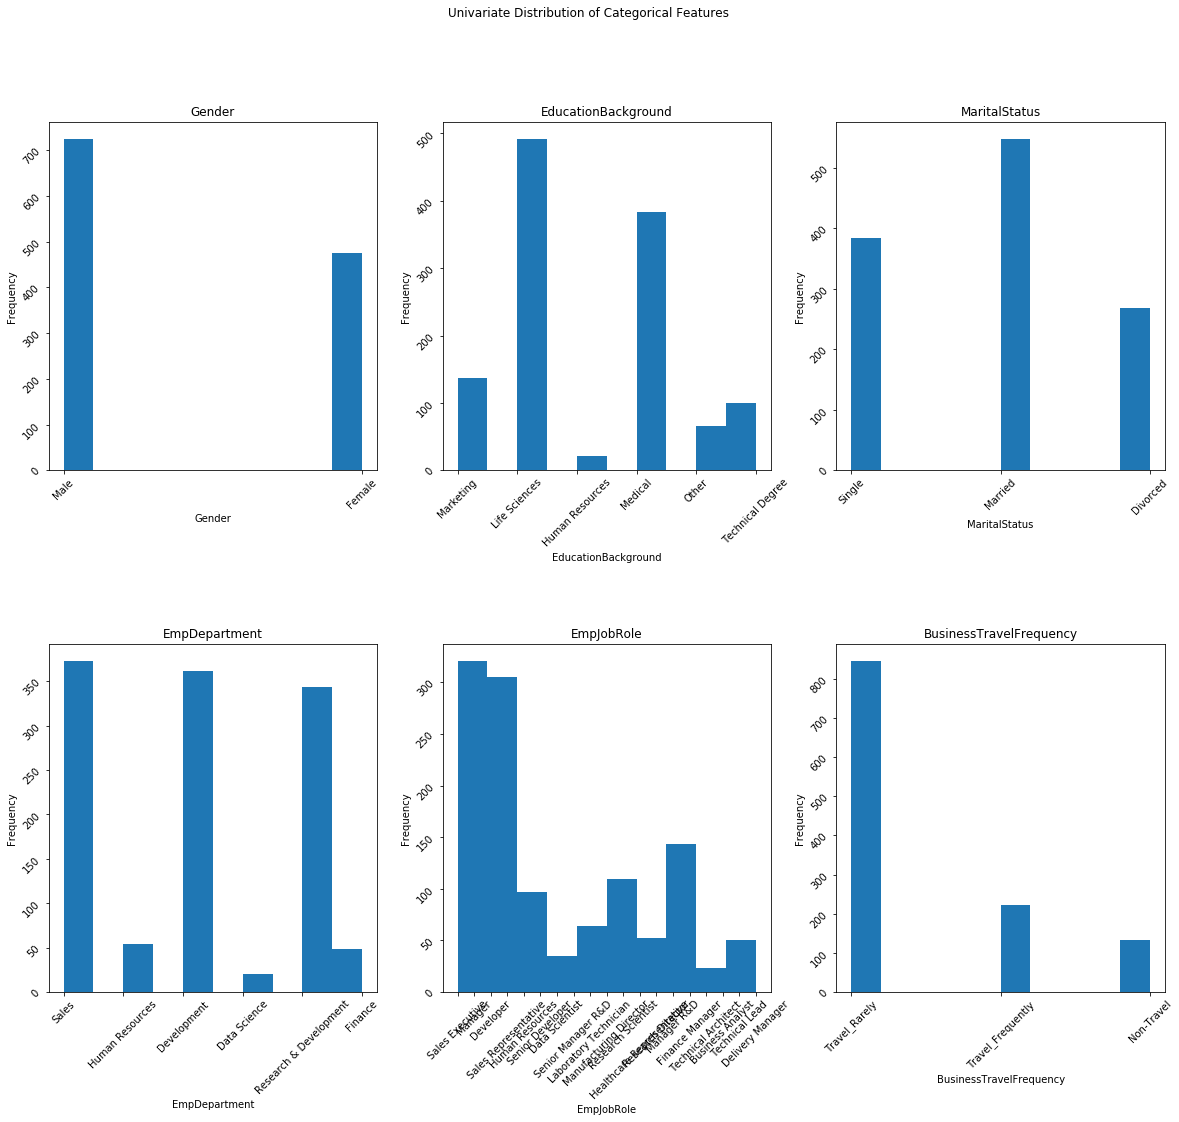

In [42]:
width = 3
fig, ax=plt.subplots(2, width, figsize=(20,16))
fig.suptitle('Univariate Distribution of Categorical Features')
fig.subplots_adjust(hspace=0.5)
for row in range(len(ax)):
    for column in range(len(ax[0])):
        i = width*row +column
        ax[row,column].hist(df[to_plot2[i]])
        ax[row,column].title.set_text(to_plot2[i])
        ax[row,column].set_xlabel(to_plot2[i])
        ax[row,column].set_ylabel('Frequency')
        ax[row,column].tick_params(labelrotation=45)

        
plt.show()

## 3. Split data into training and test set & Preprocess data

In [54]:
target = df['PerformanceRating']

features = df.copy()
features = features.drop(columns = ['PerformanceRating'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)